In [1]:
import pandas as pd
import nilearn
from nilearn import image
import numpy as np
%matplotlib inline
from nilearn.image import new_img_like
from nilearn import plotting
from nilearn import input_data
import matplotlib.pyplot as plt
from nilearn.input_data import NiftiMasker
import random
from nilearn import image
from nilearn.plotting import plot_stat_map, show

In [2]:
import random

def k_means_clust(data,num_clust,num_iter):
    centroids=random.sample(list(data),num_clust)
    counter=0
    for n in range(num_iter):
        counter+=1
        print(counter)
        assignments={}
        #assign data points to clusters
        for ind,i in enumerate(data):
            min_dist=float('inf')
            closest_clust=None
            for c_ind,j in enumerate(centroids):
                if LB_Keogh(i,j,5)<min_dist:
                    cur_dist=DTWDistance(i,j)
                    if cur_dist<min_dist:
                        min_dist=cur_dist
                        closest_clust=c_ind
            if closest_clust in assignments:
                assignments[closest_clust].append(ind)
            else:
                assignments[closest_clust]=[]

        #recalculate centroids of clusters
        for key in assignments:
            clust_sum=0
            for k in assignments[key]:
                clust_sum=clust_sum+data[k]
            centroids[key]=[m/len(assignments[key]) for m in clust_sum]

    return centroids,assignments

def DTWDistance(s1, s2):
    DTW={}

    for i in range(len(s1)):
        DTW[(i, -1)] = float('inf')
    for i in range(len(s2)):
        DTW[(-1, i)] = float('inf')
    DTW[(-1, -1)] = 0

    for i in range(len(s1)):
        for j in range(len(s2)):
            dist= (s1[i]-s2[j])**2
            DTW[(i, j)] = dist + min(DTW[(i-1, j)],DTW[(i, j-1)], DTW[(i-1, j-1)])

    return (DTW[len(s1)-1, len(s2)-1])**0.5

def LB_Keogh(s1,s2,r):
    LB_sum=0
    for ind,i in enumerate(s1):

        lower_bound=min(s2[(ind-r if ind-r>=0 else 0):(ind+r)])
        upper_bound=max(s2[(ind-r if ind-r>=0 else 0):(ind+r)])

        if i>upper_bound:
            LB_sum=LB_sum+(i-upper_bound)**2
        elif i<lower_bound:
            LB_sum=LB_sum+(i-lower_bound)**2

    return (LB_sum)**0.5

In [13]:
##
nb_patient=37
for i in range(1,nb_patient+1):
    num_patient='p'+str(i)
    path_patient='/Users/Paul/Documents/articles/Perso/FET_dyn_IDH/dynamique/'
    images_p=nilearn.image.load_img(path_patient+num_patient+'/preprocessing/rr*.nii')
    mask_p=nilearn.image.load_img(path_patient+num_patient+'/preprocessing/mask_dil_*.nii')
    #images_p.to_filename(path_patient+'FINAL/DATA/'+num_patient+'.nii.gz')
    #mask_p.to_filename(path_patient+'FINAL/MASK/mask_dil_'+num_patient+'.nii')
    #dataset.append(path_patient+'DATA/'+num_patient+'.nii.gz')
   #mask_dataset.append(path_patient+'MASK/mask_dil_'+num_patient+'.nii')

In [14]:
######### Charge les données
dataset=[]
mask_dataset=[]
mask_neurom='/Users/Paul/Documents/articles/Perso/FET/patients/SPM/Neuromorphometrics_mask.nii'
n_patient=37
for i in range(1,n_patient+1):
    num_patient='p'+str(i)
    path_patient='/Users/Paul/Documents/articles/Perso/FET_dyn_IDH/dynamique/FINAL/'
    dataset.append(path_patient+'DATA/'+num_patient+'.nii.gz')
    mask_dataset.append(path_patient+'MASK/mask_dil_'+num_patient+'.nii')

#######nb de voxel par mask
mask=nilearn.image.load_img(mask_dataset)
nb_voxel_mask=[]
for i in range(0,np.size(mask_dataset)):
    maski=image.index_img(mask, i)
    nb_voxel_mask.append(np.sum(maski.get_data()>0))
    
##    
l_patient=np.arange(1,len(dataset)+1)
l_patient_long=np.repeat(l_patient,nb_voxel_mask)
target_patient=set(l_patient)

In [15]:
 #####################A REFAIRE POUR CHAQUE PATIENT #####
########### ATTENTION au dataset[0 !!] ordre dans la liste diff du num

 #         A CHANGER : les num des masker et les mask / dataset
### patient 1
masker1 = NiftiMasker(mask_img=image.index_img(mask, 0),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked1 = masker1.fit_transform(dataset[0])
### patient 2
masker2 = NiftiMasker(mask_img=image.index_img(mask, 1),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked2 = masker2.fit_transform(dataset[1])
### patient 3
masker3= NiftiMasker(mask_img=image.index_img(mask, 2),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked3 = masker3.fit_transform(dataset[2])
### patient 4
masker4 = NiftiMasker(mask_img=image.index_img(mask, 3),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked4 = masker4.fit_transform(dataset[3])
### patient 5
masker5 = NiftiMasker(mask_img=image.index_img(mask, 4),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked5 = masker5.fit_transform(dataset[4])

### patient 6
masker6 = NiftiMasker(mask_img=image.index_img(mask, 5),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked6 = masker6.fit_transform(dataset[5])

### patient 7
masker7 = NiftiMasker(mask_img=image.index_img(mask, 6),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked7 = masker7.fit_transform(dataset[6])
### patient 8
masker8 = NiftiMasker(mask_img=image.index_img(mask, 7),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked8 = masker8.fit_transform(dataset[7])

### patient 9
masker9 = NiftiMasker(mask_img=image.index_img(mask, 8),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked9 = masker9.fit_transform(dataset[8])
### patient 10
masker10 = NiftiMasker(mask_img=image.index_img(mask, 9),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked10 = masker10.fit_transform(dataset[9])
### patient 11
masker11 = NiftiMasker(mask_img=image.index_img(mask, 10),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked11 = masker11.fit_transform(dataset[10])
### patient 12
masker12 = NiftiMasker(mask_img=image.index_img(mask, 11),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked12 = masker12.fit_transform(dataset[11])
### patient 13
masker13 = NiftiMasker(mask_img=image.index_img(mask, 12),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked13 = masker13.fit_transform(dataset[12])
### patient 14
masker14 = NiftiMasker(mask_img=image.index_img(mask, 13),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked14 = masker14.fit_transform(dataset[13])
### patient 15
masker15 = NiftiMasker(mask_img=image.index_img(mask, 14),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked15 = masker15.fit_transform(dataset[14])

### patient 16
masker16 = NiftiMasker(mask_img=image.index_img(mask, 15),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked16 = masker16.fit_transform(dataset[15])
### patient 17
masker17 = NiftiMasker(mask_img=image.index_img(mask, 16),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked17 = masker17.fit_transform(dataset[16])
### patient 18
masker18 = NiftiMasker(mask_img=image.index_img(mask, 17),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked18 = masker18.fit_transform(dataset[17])

### patient 19
masker19 = NiftiMasker(mask_img=image.index_img(mask, 18),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked19 = masker19.fit_transform(dataset[18])
### patient 20
masker20 = NiftiMasker(mask_img=image.index_img(mask, 19),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked20 = masker20.fit_transform(dataset[19])
### patient 21
masker21 = NiftiMasker(mask_img=image.index_img(mask, 20),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked21 = masker21.fit_transform(dataset[20])
### patient 22
masker22 = NiftiMasker(mask_img=image.index_img(mask, 21),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked22 = masker22.fit_transform(dataset[21])
### patient 23
masker23 = NiftiMasker(mask_img=image.index_img(mask, 22),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked23 = masker23.fit_transform(dataset[22])
### patient 24
masker24 = NiftiMasker(mask_img=image.index_img(mask, 23),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked24 = masker24.fit_transform(dataset[23])
### patient 25
masker25 = NiftiMasker(mask_img=image.index_img(mask, 24),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked25 = masker25.fit_transform(dataset[24])
### patient 26
masker26 = NiftiMasker(mask_img=image.index_img(mask, 25),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked26 = masker26.fit_transform(dataset[25])

### patient 27
masker27 = NiftiMasker(mask_img=image.index_img(mask, 26),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked27 = masker27.fit_transform(dataset[26])

### patient 28
masker28 = NiftiMasker(mask_img=image.index_img(mask, 27),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked28 = masker28.fit_transform(dataset[27])

### patient 29
masker29= NiftiMasker(mask_img=image.index_img(mask, 28),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked29 = masker29.fit_transform(dataset[28])

### patient 30
masker30 = NiftiMasker(mask_img=image.index_img(mask, 29),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked30 = masker30.fit_transform(dataset[29])

### patient 31
masker31 = NiftiMasker(mask_img=image.index_img(mask, 30),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked31 = masker31.fit_transform(dataset[30])

### patient 32
masker32 = NiftiMasker(mask_img=image.index_img(mask, 31),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked32 = masker32.fit_transform(dataset[31])

### patient 33
masker33 = NiftiMasker(mask_img=image.index_img(mask, 32),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked33 = masker33.fit_transform(dataset[32])

### patient 34
masker34 = NiftiMasker(mask_img=image.index_img(mask, 33),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked34 = masker34.fit_transform(dataset[33])

### patient 35
masker35 = NiftiMasker(mask_img=image.index_img(mask, 34),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked35 = masker35.fit_transform(dataset[34])

### patient 36
masker36 = NiftiMasker(mask_img=image.index_img(mask, 35),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked36 = masker36.fit_transform(dataset[35])


### patient 37
masker37 = NiftiMasker(mask_img=image.index_img(mask, 36),smoothing_fwhm=8, memory='nilearn_cache', memory_level=1, standardize=True)
data_masked37 = masker37.fit_transform(dataset[36])


In [16]:
#####SI TOUS LES PATIENTS
############## ajouter les uns à la suite des autres+++
X=np.concatenate((data_masked1,data_masked2,data_masked3,data_masked4,
                 data_masked5,data_masked6,data_masked7,data_masked8,data_masked9,data_masked10,data_masked11,data_masked12,
                 data_masked13,data_masked14,data_masked15,data_masked16,data_masked17,data_masked18,data_masked19,
                 data_masked20,data_masked21,data_masked22,data_masked23,data_masked24,data_masked25,data_masked26,data_masked27,
                 data_masked28,data_masked29,data_masked30,data_masked31,data_masked32,data_masked33,data_masked34,
                 data_masked35,data_masked36,data_masked37),axis=1)

if (X.shape[1]-np.sum(nb_voxel_mask))!=0 : 
    print("ATTENTION ERREUR MASKER")

In [17]:
vox_ts=X.T


In [18]:
centroids1_8,assignments1_8=k_means_clust(vox_ts,1,8)

1
2
3
4
5
6
7
8


In [19]:
centroids2_8,assignments2_8=k_means_clust(vox_ts,2,8)

1
2
3
4
5
6
7
8


In [20]:
centroids3_8,assignments3_8=k_means_clust(vox_ts,3,8)

1
2
3
4
5
6
7
8


In [21]:
centroids4_8,assignments4_8=k_means_clust(vox_ts,4,8)

1
2
3
4
5
6
7
8


In [22]:
centroids5_8,assignments5_8=k_means_clust(vox_ts,5,8)

1
2
3
4
5
6
7
8


In [23]:
centroids6_8,assignments6_8=k_means_clust(vox_ts,6,8)

1
2
3
4
5
6
7
8


In [27]:
MSE_cluster=[]

In [37]:
min_MSE=np.repeat(np.nan,vox_ts.shape[0])
vox_MSE=np.repeat(np.nan,vox_ts.shape[0])
for iter_test in range(0,(vox_ts.shape[0])):
    min_dist=np.argmin(np.sum((vox_ts[iter_test]-centroids6_8)**2,axis=1))
    min_MSE[iter_test]=min_dist
    vox_MSE[iter_test]=np.sum((vox_ts[iter_test]-centroids6_8[int(min_MSE[iter_test])])**2)


In [39]:
MSE_cluster

[1099513.2694235423,
 434713.72993474966,
 313183.31404448039,
 252927.83986166638,
 240597.03387366122,
 232924.40666993498]

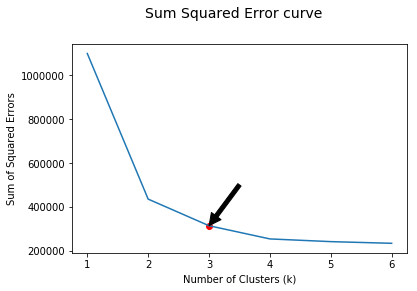

In [48]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

fig = plt.figure()
fig.suptitle('Sum Squared Error curve', fontsize=14)

ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)
ax.set_xlabel('Number of Clusters (k)')
ax.set_ylabel('Sum of Squared Errors')

#ax.set_ylim([0,1100000])
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.plot([3], [313183], 'o',color='r')
ax.annotate('', xy=(3, 313183), xytext=(3.5, 500000),
            arrowprops=dict(facecolor='black', shrink=0.001))

ax.plot(x,MSE_cluster)

fig.savefig('SSE_cluster_3.png')